In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_csv("Company_Data.csv")

# Step 2: Preprocess the data
# Convert the target variable "Sales" into a categorical variable
data['Sales_Category'] = pd.cut(data['Sales'], bins=[0, 5, 10, 15, 20, float('inf')], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Drop the original "Sales" column
data.drop('Sales', axis=1, inplace=True)

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])

# Step 3: Split the dataset into training and testing sets
X = data.drop('Sales_Category', axis=1)
y = data['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build a decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.575

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
         Low       0.69      0.68      0.69        50
      Medium       0.43      0.38      0.40        16
    Very Low       0.38      0.43      0.40        14

    accuracy                           0.57        80
   macro avg       0.37      0.37      0.37        80
weighted avg       0.59      0.57      0.58        80



C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [2]:
from sklearn.metrics import confusion_matrix

# Calculate train accuracy
train_accuracy = model.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Calculate train confusion matrix
y_train_pred = model.predict(X_train)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

# Calculate test confusion matrix
test_conf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest Confusion Matrix:")
print(test_conf_matrix)


Train Accuracy: 1.0
Test Accuracy: 0.575

Train Confusion Matrix:
[[  2   0   0   0]
 [  0 195   0   0]
 [  0   0  60   0]
 [  0   0   0  62]]

Test Confusion Matrix:
[[ 0  0  0  0]
 [ 0 34  7  9]
 [ 1  8  6  1]
 [ 0  7  1  6]]


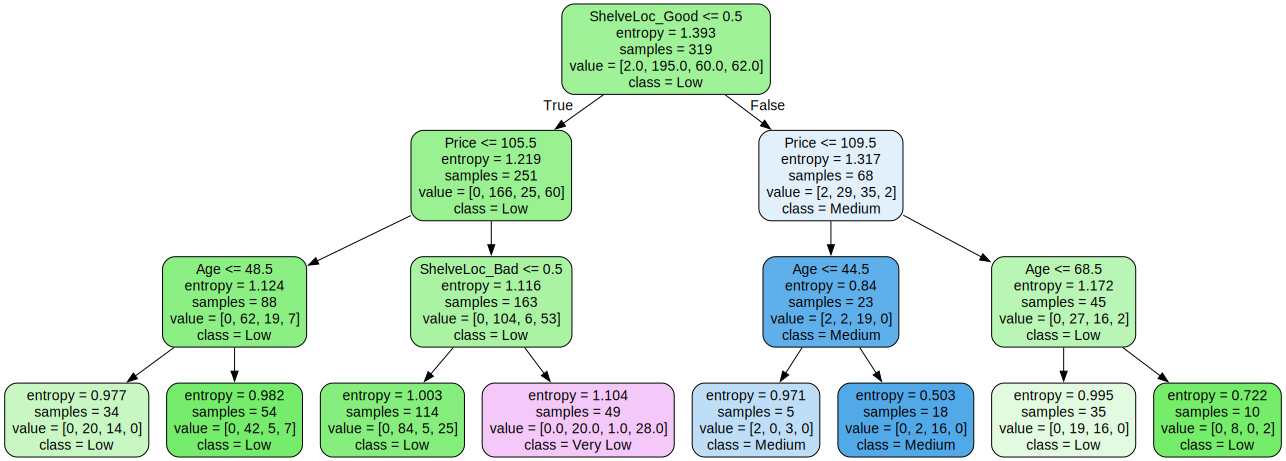

In [7]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a Graphviz file
export_graphviz(model, out_file="decision_tree.dot", 
                feature_names=X.columns, class_names=model.classes_, 
                filled=True, rounded=True)

# Visualize the decision tree using Graphviz
with open("decision_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


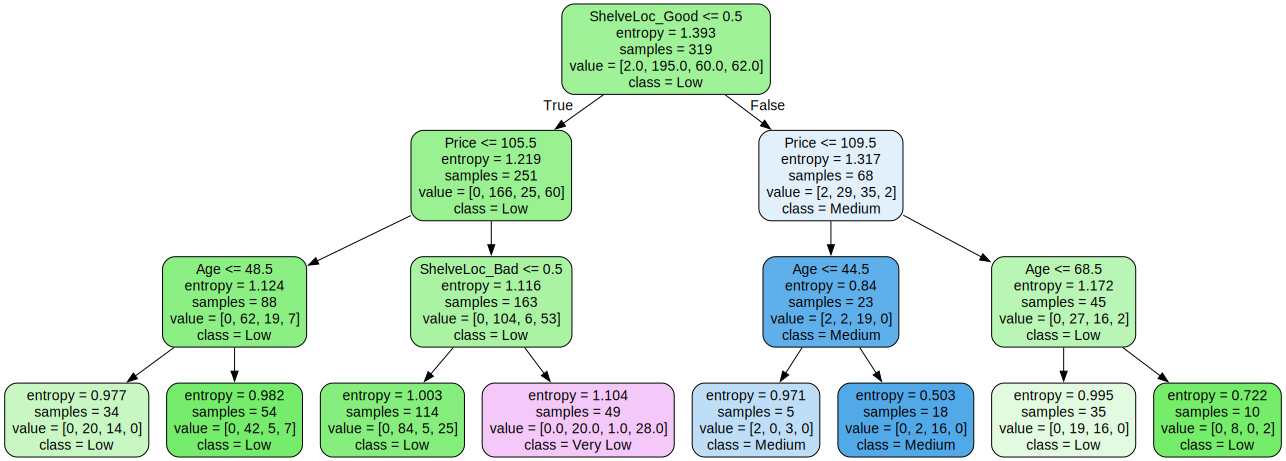

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Specify the maximum depth for the decision tree
max_depth = 3

# Build decision tree model with entropy criterion and specified max_depth
model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

# Export the decision tree to a Graphviz file
export_graphviz(model, out_file="decision_tree.dot", 
                feature_names=X.columns, class_names=model.classes_, 
                filled=True, rounded=True)

# Visualize the decision tree using Graphviz
with open("decision_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.6649305555555556
Train Accuracy: 0.9467084639498433
Test Accuracy: 0.7125

Train Confusion Matrix:
[[  2   0   0   0]
 [  0 193   0   2]
 [  0   8  52   0]
 [  0   7   0  55]]

Test Confusion Matrix:
[[ 0  0  0  0]
 [ 0 43  3  4]
 [ 1  9  6  0]
 [ 0  6  0  8]]


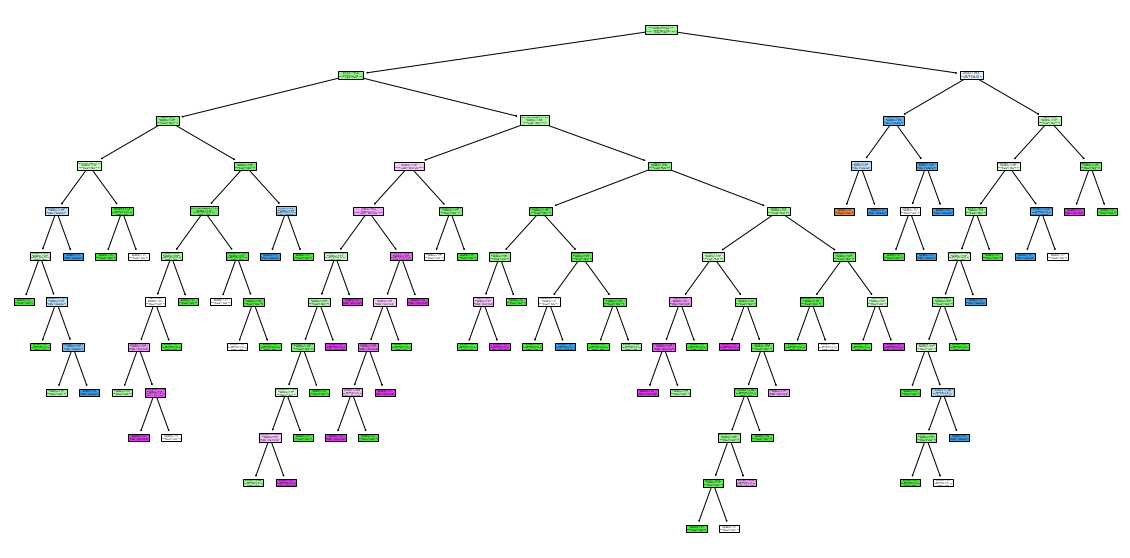

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the training set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate train confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

# Calculate test confusion matrix
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Plot decision tree for the best model
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=best_model.classes_, filled=True)
plt.show()


Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.6822916666666666
Train Accuracy: 0.7899686520376176
Test Accuracy: 0.65

Train Confusion Matrix:
[[  0   0   2   0]
 [  0 194   1   0]
 [  0  27  33   0]
 [  0  37   0  25]]

Test Confusion Matrix:
[[48  2  0]
 [13  3  0]
 [13  0  1]]


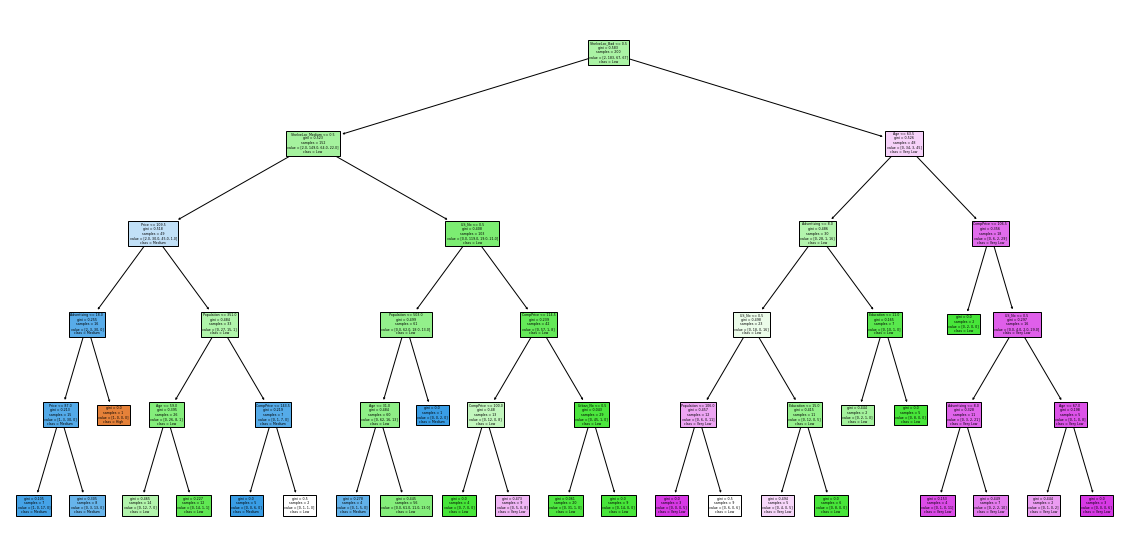

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation with ShuffleSplit
shuffle_cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=shuffle_cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the training set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate train confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

# Calculate test confusion matrix
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Plot decision tree for one of the trees in the forest
plt.figure(figsize=(20,10))
plot_tree(best_model.estimators_[0], feature_names=X.columns, class_names=best_model.classes_, filled=True)
plt.show()


Feature ranking:
1. Feature 4 (0.191442)
2. Feature 8 (0.105156)
3. Feature 5 (0.105114)
4. Feature 2 (0.093929)
5. Feature 0 (0.089870)
6. Feature 3 (0.087580)
7. Feature 1 (0.087198)
8. Feature 7 (0.072963)
9. Feature 9 (0.059993)
10. Feature 6 (0.053017)
11. Feature 12 (0.017033)
12. Feature 13 (0.014981)
13. Feature 10 (0.013146)
14. Feature 11 (0.008580)


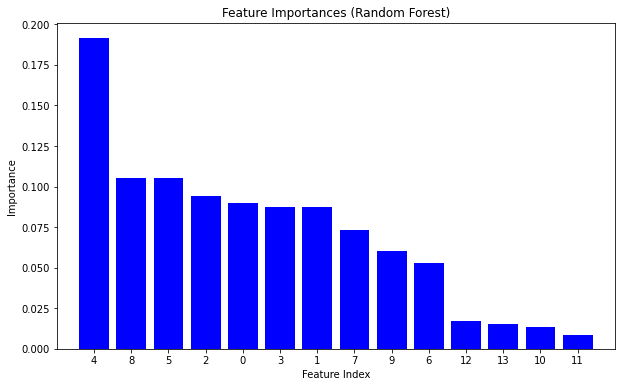

In [12]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Train Random Forest model (best_model is assumed to be already trained)
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Get feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.xlim([-1, X_train.shape[1]])
plt.show()


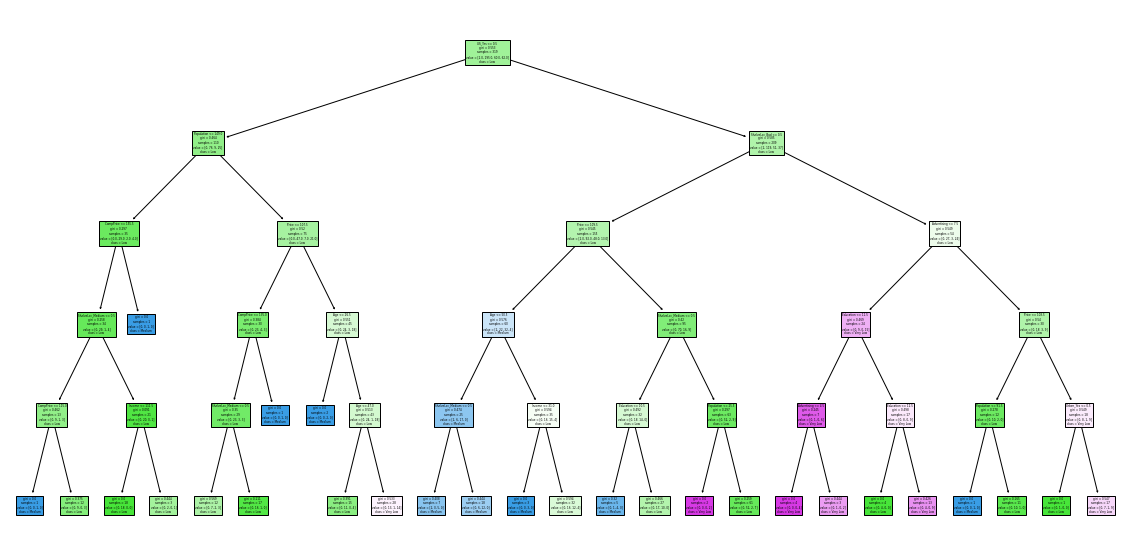

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Assuming best_params contains hyperparameters appropriate for a Decision Tree
# Remove 'n_estimators' from best_params if it's present
best_params_dt = {k: v for k, v in best_params.items() if k != 'n_estimators'}

# Initialize Decision Tree classifier with the corrected best_params
best_model_dt = DecisionTreeClassifier(random_state=42, **best_params_dt)
best_model_dt.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model_dt, feature_names=X.columns, class_names=best_model_dt.classes_, filled=True)
plt.show()
